In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
heart=pd.read_csv('Heartdiseases.csv')

In [3]:
heart.head(5)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,0,1,125,212,1,1,168,2,1,2,1,0
1,53,0,1,140,203,0,0,155,1,2,0,1,0
2,70,0,1,145,174,1,1,125,1,2,0,1,0
3,61,0,1,148,203,1,1,161,2,1,1,1,0
4,62,1,1,138,294,0,1,106,2,3,3,2,0


In [4]:
columns_to_drop=[ 'age']

In [5]:
heart=heart.drop(columns_to_drop,axis=1)

In [6]:
#split dataset in features and target variable
feature_columns = ['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy','thalassemia']
X = heart[feature_columns] # Features
y = heart.target # Target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:

clf = DecisionTreeClassifier()



In [9]:
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [11]:
print(X_train.dtypes)

chest_pain_type                  int64
fasting_blood_sugar              int64
rest_ecg                         int64
Max_heart_rate                   int64
exercise_induced_angina          int64
slope                            int64
vessels_colored_by_flourosopy    int64
thalassemia                      int64
dtype: object


In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9805194805194806


In [13]:
X_train = pd.get_dummies(X_train)

In [14]:
print("Training features:", X_train.columns)

Training features: Index(['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')


In [15]:
print("Test features:", X_test.columns)


Test features: Index(['chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy',
       'thalassemia'],
      dtype='object')


In [16]:

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)


# One-hot encode categorical variables in the test set
X_test_encoded = pd.get_dummies(X_test)

# Align the columns to match those in the training set
X_test_aligned = X_test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Predict using the aligned test set
y_pred = clf.predict(X_test_aligned)

In [17]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9805194805194806


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


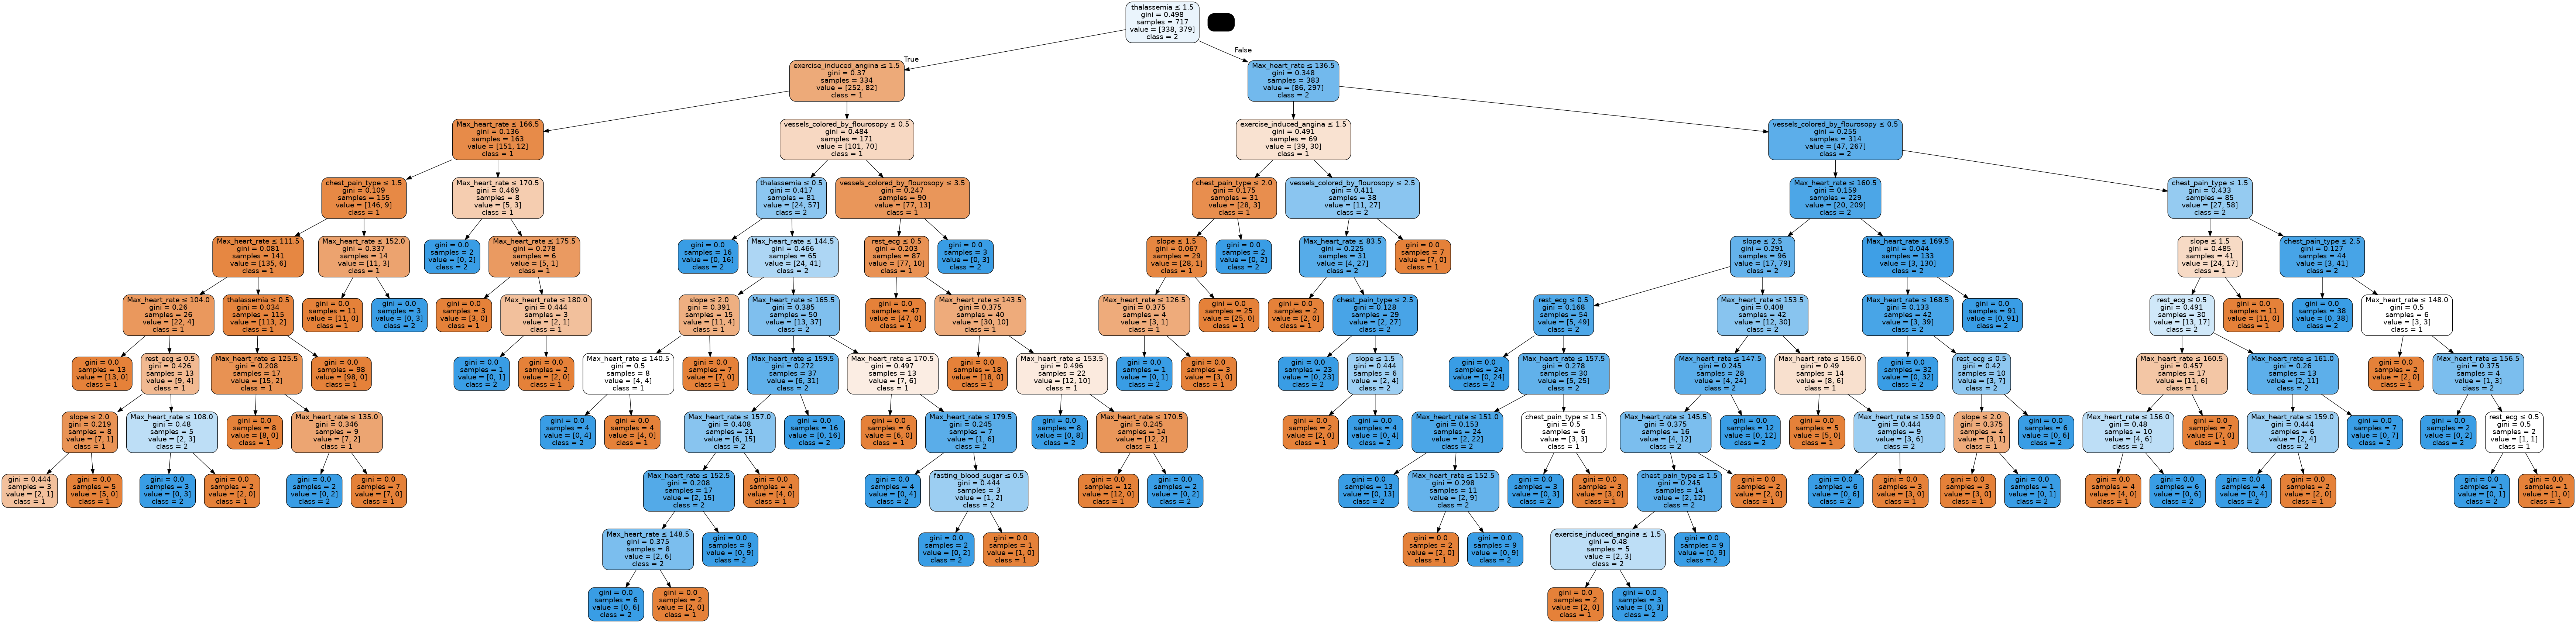

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())

In [21]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pydotplus graphviz


Note: you may need to restart the kernel to use updated packages.


In [23]:
# Assuming you used one-hot encoding, get the feature names
feature_cols = X_train.columns.tolist()


In [24]:
print("Actual feature names used during training:", clf.feature_names_in_)


Actual feature names used during training: ['chest_pain_type' 'fasting_blood_sugar' 'rest_ecg' 'Max_heart_rate'
 'exercise_induced_angina' 'slope' 'vessels_colored_by_flourosopy'
 'thalassemia']


In [25]:
class_names = [str(x) for x in clf.classes_]


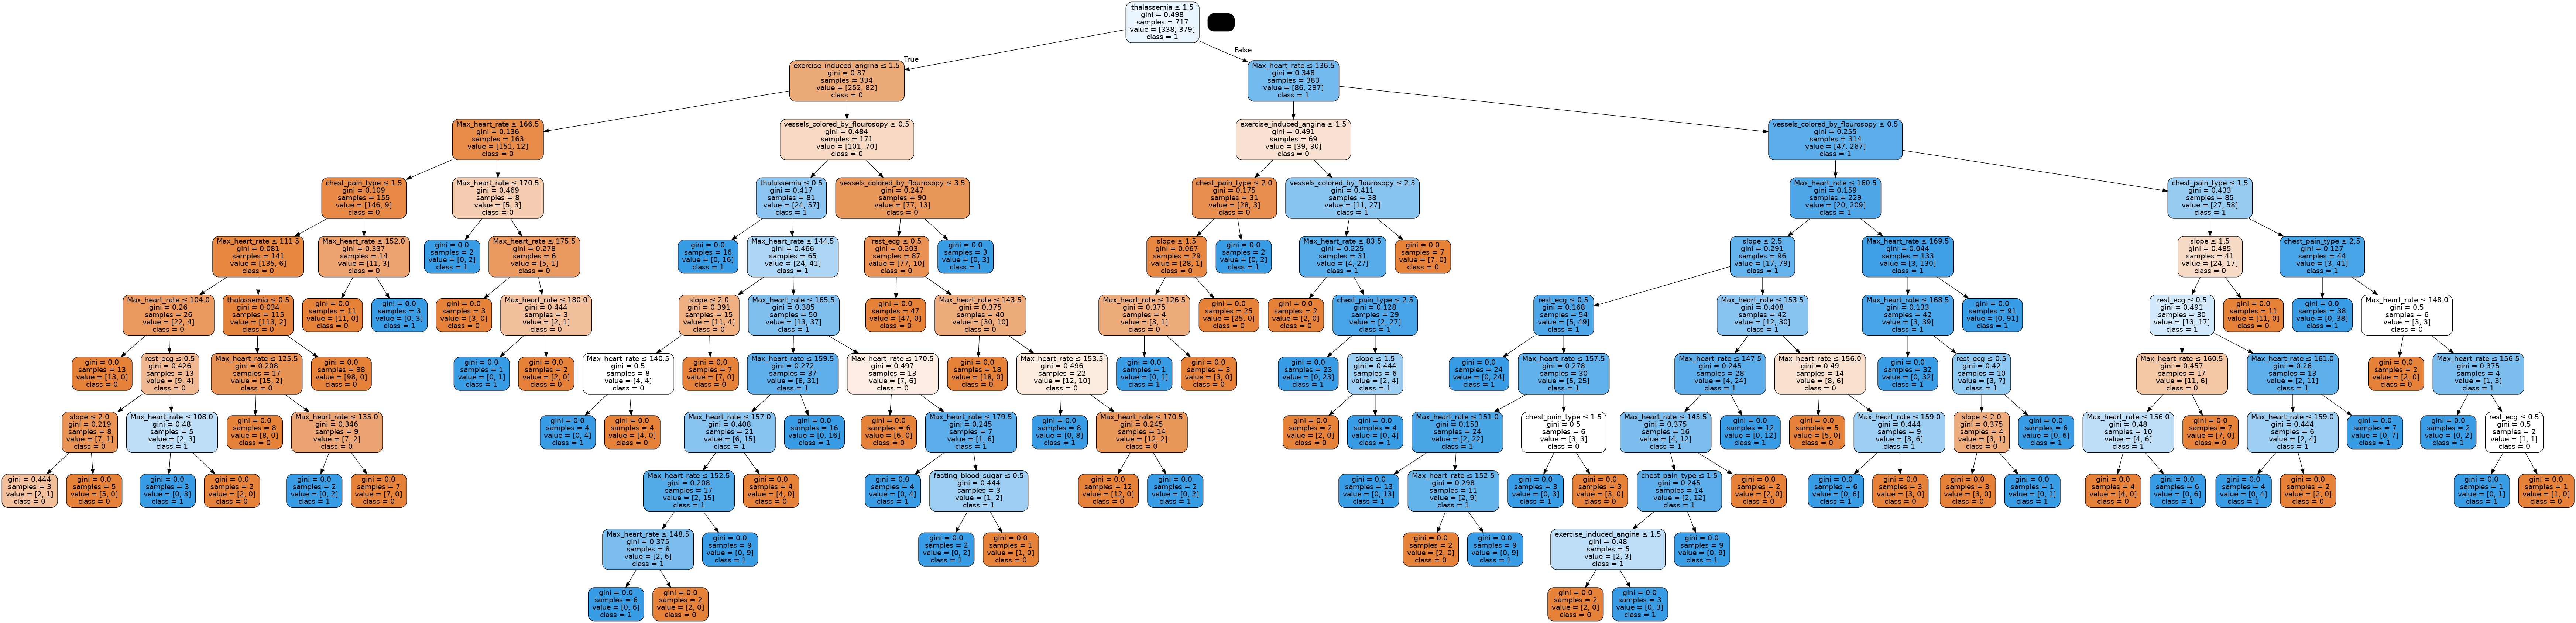

In [26]:
from sklearn.tree import export_graphviz
from io import StringIO  
from IPython.display import Image  
import pydotplus

# Assuming 'clf' is your fitted DecisionTreeClassifier
dot_data = StringIO()
class_names = [str(x) for x in clf.classes_]
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=clf.feature_names_in_, class_names=class_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heartdisease.png')
Image(graph.create_png())
